# To Explore Supervised Machine Learning Algorithm

## Problem Statement
The goal is to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Dataset :
In this data there are two variables
1.**Hours**: Number of hours a student spend his/her time on studies
2.**Scores**: Percentage of marks.
Here we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is simple linear regression task as it involes two variables

Importing all required libraries & Dataset

## Importing all required libraries & Dataset¶


In [9]:
conda install scikit-learn 


Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df = pd.read_csv('http://bit.ly/w-data')
df.head(5)
X = df.iloc[:,:-1]


In [14]:
df.shape

(25, 2)

# Exploratory Data Analysis

Checking missing values

In [22]:
missing_val_count_by_column = (df.isnull().sum())

In [23]:
missing_val_count_by_column

Hours     0
Scores    0
dtype: int64

In [24]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6215E5308>,
      dtype=object)

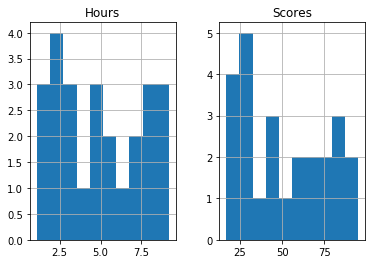

In [33]:
df.hist()

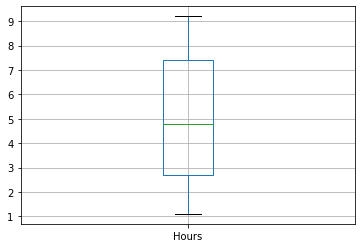

In [50]:
df.boxplot(column =  "Hours")

Text(0, 0.5, 'Percentage scored')

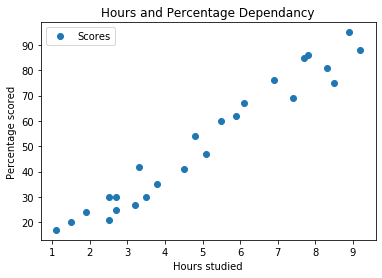

In [54]:
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours and Percentage Dependancy')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')

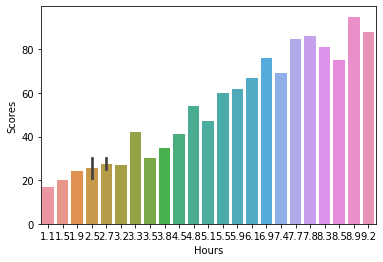

In [56]:
sns.barplot(x=df['Hours'],y=df['Scores'])

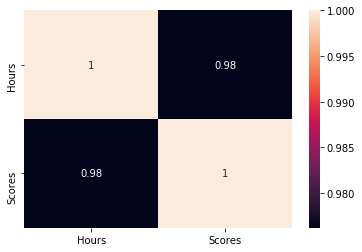

In [61]:
sns.heatmap(df.corr(),annot = True)

## Data preprocessing

In [62]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values

In [64]:
# Splitting the dataset into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

## Training our Model

In [66]:
#Fitting Linear Regression
from sklearn.linear_model import LinearRegression
#create a model object
lr = LinearRegression()
#train the model object
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Interpreting Coefficients

In [81]:
# prints y intercept
print(lr.intercept_)
# prints beta coefficients in same order as passed
print(lr.coef_)
# zip can pair feature namesw and coefficients together
zip(X, lr.coef_)

2.018160041434683
[9.91065648]


## Prediction

In [74]:
Y_pred = lr.predict(X_test)
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [75]:
#Comparing Actual vs Predicted
Data = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
Data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Visualization

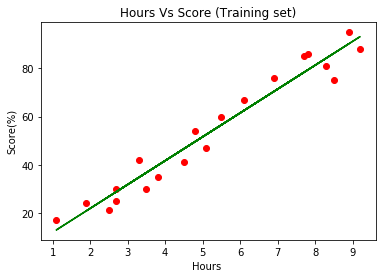

In [76]:
plt.scatter(X_train, Y_train, color = "red")
plt.plot(X_train, lr.predict(X_train), color = "green")
plt.title("Hours Vs Score (Training set)")
plt.xlabel("Hours ")
plt.ylabel("Score(%)")
plt.show()

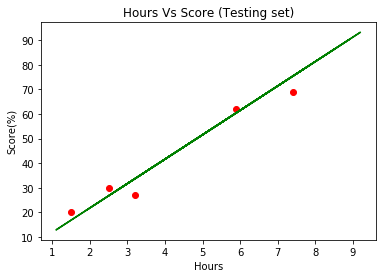

In [78]:
plt.scatter(X_test, Y_test, color = "red")
plt.plot(X_train, lr.predict(X_train), color = "green")
plt.title("Hours Vs Score (Testing set)")
plt.xlabel("Hours")
plt.ylabel("Score(%)")
plt.show()

## Predicting for value 9.25

In [79]:
hours = (9.25)
pred=lm.predict([[9.25]])
print('Number of Hours = {}'.format(hours))
print('Predicted Score = {}'.format(pred))

Number of Hours = 9.25
Predicted Score = [93.69173249]


## Model Evaluation

In [88]:
# Import metrice3s library
from sklearn import metrics

# print result of MAE
print("MAE: ",metrics.mean_absolute_error(Y_test, Y_pred))

# print result of MSE
print("MSE: ",metrics.mean_squared_error(Y_test, Y_pred))

# Print result of RMSE
print("RMSE: ",np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
r2=metrics.r2_score(Y_test,Y_pred)
print('R Square:',r2)

MAE:  4.183859899002975
MSE:  21.5987693072174
RMSE:  4.6474476121003665
R Square: 0.9454906892105356
